Importing Libs

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df=pd.read_csv('Combined_Data.csv')

In [50]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [51]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [52]:
df.describe()

,statement,status
count,52681,53043
unique,51073,7
top,what do you mean?,Normal
freq,22,16351


In [53]:
df["status"].value_counts()

,count
status,
Normal,16351
Depression,15404
Suicidal,10653
Anxiety,3888
Bipolar,2877
Stress,2669
Personality disorder,1201


In [54]:
df.isnull().sum()

,0
statement,362
status,0


In [55]:
df.duplicated().sum()

np.int64(1944)

#Insights
Imbalanced dataset
count-53k
null values - 362
duplicate - 1944

##Data Cleaning

In [56]:
df.dropna(inplace=True)

In [57]:
df.drop_duplicates(inplace=True)

In [58]:
df.status.value_counts()

,count
status,
Normal,16040
Depression,15094
Suicidal,10644
Anxiety,3623
Bipolar,2501
Stress,2296
Personality disorder,895


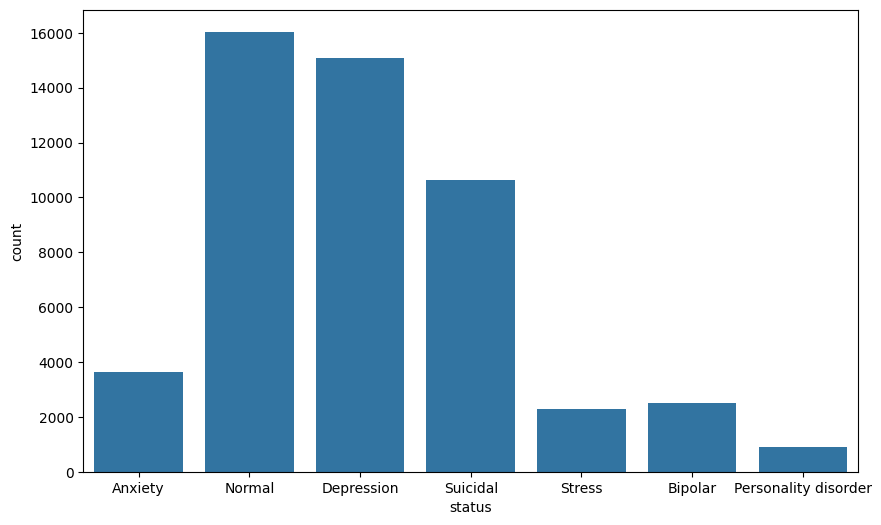

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(x='status',data=df)
plt.show()

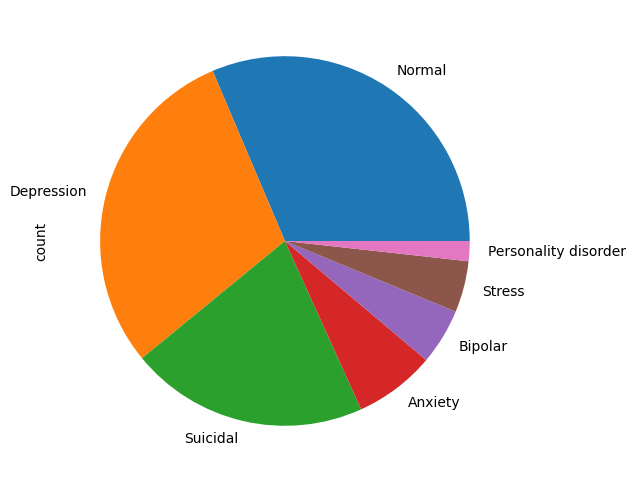

In [60]:
df['status'].value_counts().plot(kind='pie',figsize=(10,6))
plt.show()

In [61]:
df=df.sample(n=6000,random_state=42).reset_index(drop=True)

In [62]:
df.status.value_counts()

,count
status,
Normal,1905
Depression,1754
Suicidal,1248
Anxiety,438
Bipolar,292
Stress,262
Personality disorder,101


In [63]:
no_of_words=df.statement.apply(lambda x:len(x.split()))
no_of_words.head()

,statement
0,11
1,30
2,225
3,66
4,6


In [64]:
no_of_lines=df.statement.apply(lambda x:len(x.split(".")))
no_of_lines.head()

,statement
0,1
1,6
2,14
3,7
4,1


In [65]:
df=pd.concat([df,no_of_words,no_of_lines],axis=1)
df.columns=['statement','status','no_of_words','no_of_lines']
df.head()

,statement,status,no_of_words,no_of_lines
0,I take 100 mg orally How much zoloft is too much?,Suicidal,11,1
1,Sometimes my voice catches for a minute and I ...,Stress,30,6
2,"i am 17f and first of all, my family got issue...",Depression,225,14
3,I already have a plan. Ill wait until late at ...,Suicidal,66,7
4,WHAT DO YOU SAY TO DREAMIES??!!!,Normal,6,1


In [66]:
nltk.download('stopwords')
stop_words=(nltk.corpus.stopwords.words('english'))
nltk.download('punkt_tab')

def cleaning(text):
    preprocessed=text.lower()
    preprocessed=re.sub(r"[^a-zA-Z\s]","",preprocessed)
    words=nltk.word_tokenize(preprocessed)
    filtered_words=[word for word in words if word not in stop_words]
    return " ".join(filtered_words)

df.statement=df.statement.apply(cleaning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [67]:
df.describe()

,no_of_words,no_of_lines
count,6000.000000,6000.000000
mean,113.224667,6.990500
std,167.626329,10.606484
min,1.000000,1.000000
25%,15.000000,1.000000
50%,61.000000,4.000000
75%,146.000000,9.000000
max,2599.000000,248.000000


In [68]:
sample=df.drop('statement',axis=1)
sample.head()

,status,no_of_words,no_of_lines
0,Suicidal,11,1
1,Stress,30,6
2,Depression,225,14
3,Suicidal,66,7
4,Normal,6,1


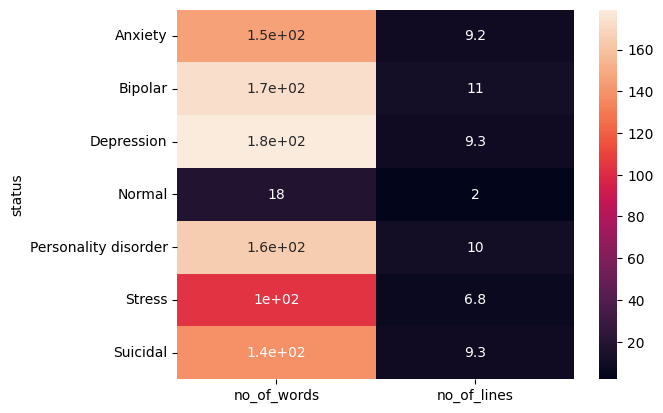

In [69]:
grouped = df.groupby('status')[['no_of_words', 'no_of_lines']].mean()
sns.heatmap(grouped, annot=True,)
plt.show()

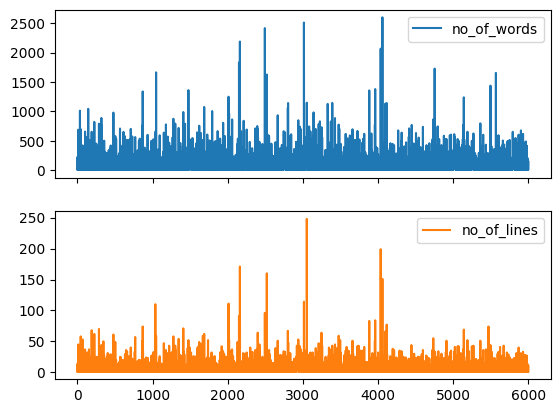

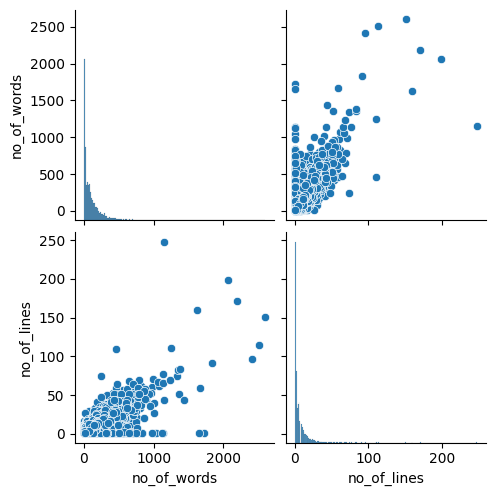

In [70]:
sample.plot(subplots=True)
sns.pairplot(sample)

In [71]:
X=df.drop(['status','no_of_lines','no_of_words'],axis=1)
y=df.status

In [72]:
sampler=RandomOverSampler(sampling_strategy="auto",random_state=42)
X_resampled,y_resampled=sampler.fit_resample(X,y)
cleaned=pd.concat([X_resampled,y_resampled],axis=1)
cleaned["status"].value_counts()

,count
status,
Suicidal,1905
Stress,1905
Depression,1905
Normal,1905
Anxiety,1905
Personality disorder,1905
Bipolar,1905


In [73]:
cleaned

,statement,status
0,take mg orally much zoloft much,Suicidal
1,sometimes voice catches minute flush dark red ...,Stress
2,f first family got issues somebody else bother...,Depression
3,already plan ill wait late night take uber tra...,Suicidal
4,say dreamies,Normal
...,...,...
13330,know care others think part worries others usi...,Suicidal
13331,tonight come realization done point denying ne...,Suicidal
13332,loved want kill,Suicidal
13333,well killed yet exactly type thing brag dinner...,Suicidal


In [100]:
cleaned.to_csv('cleaned_data_SA.csv')

ML models

In [ ]:
!pip install lightgbm catboost xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.7 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import (
    LogisticRegression, RidgeClassifier, SGDClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, ExtraTreesClassifier, StackingClassifier, VotingClassifier
)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV


In [81]:
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Ridge Classifier", RidgeClassifier()),
    ("SGD Classifier", SGDClassifier()),

    ("KNearest Neighbour", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier(max_depth=135)),

    ("Random Forest", RandomForestClassifier()),
    ("Extra Trees", ExtraTreesClassifier()),
    ("Bagging", BaggingClassifier()),

    ("Gaussian NB", GaussianNB()),
    ("BernoulliNB",BernoulliNB()),

    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0)),
    ("LightGBM", LGBMClassifier()),
]

In [76]:
X=cleaned.statement
y=cleaned.status

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [78]:
bow=CountVectorizer(max_features=3000,ngram_range=(1,3))
X_train_bow=bow.fit_transform(X_train)
X_test_bow=bow.transform(X_test)
tfidf=TfidfVectorizer(max_features=2000,ngram_range=(1,3))
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

In [32]:
def class_model_train(name, model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)


    y_pred_test = model.predict(x_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    prec_test = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
    rec_test = recall_score(y_test, y_pred_test, average='weighted', zero_division=0)
    f1_test = f1_score(y_test, y_pred_test, average='weighted', zero_division=0)

    print(f"\n---------- {name} (Test) ----------")
    print("Accuracy :", acc_test)
    print("Precision:", prec_test)
    print("Recall   :", rec_test)
    print("F1 Score :", f1_test)

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


    y_pred_train = model.predict(x_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    prec_train = precision_score(y_train, y_pred_train, average='weighted', zero_division=0)
    rec_train = recall_score(y_train, y_pred_train, average='weighted', zero_division=0)
    f1_train = f1_score(y_train, y_pred_train, average='weighted', zero_division=0)

    print(f"\n---------- {name} (Train) ----------")
    print("Accuracy :", acc_train)
    print("Precision:", prec_train)
    print("Recall   :", rec_train)
    print("F1 Score :", f1_train)
    print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))

    return acc_test,name

In [82]:
res_bow=[class_model_train(name, model, X_train_bow.toarray(), y_train, X_test_bow.toarray(), y_test) for name, model in models]
res_bow=pd.DataFrame(res_bow,columns=['Accuracy','Model'])
res_bow.sort_values(by='Accuracy',ascending=False)


---------- Logistic Regression (Test) ----------
Accuracy : 0.9186351706036745
Precision: 0.917842048765745
Recall   : 0.9186351706036745
F1 Score : 0.9165710173727188
Confusion Matrix:
 [[378   0   0   2   0   0   0]
 [  0 397   0   0   0   0   0]
 [  7   2 260  17   1   6  90]
 [  1   2   4 346   0   5   6]
 [  0   0   0   0 394   0   0]
 [  0   0   0   0   0 363   0]
 [  0   0  43  30   1   0 312]]

---------- Logistic Regression (Train) ----------
Accuracy : 0.9888451443569554
Precision: 0.9889963789594178
Recall   : 0.9888451443569554
F1 Score : 0.9888316691626059
Confusion Matrix:
 [[1521    0    0    4    0    0    0]
 [   0 1508    0    0    0    0    0]
 [   1    0 1456   22    0    1   42]
 [   2    0    0 1536    0    0    3]
 [   0    0    0    0 1511    0    0]
 [   0    0    0    0    0 1542    0]
 [   0    0   11   33    0    0 1475]]

---------- Ridge Classifier (Test) ----------
Accuracy : 0.8421447319085115
Precision: 0.8522180725014566
Recall   : 0.8421447319085115


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



---------- LightGBM (Test) ----------
Accuracy : 0.9156355455568054
Precision: 0.9141664924435106
Recall   : 0.9156355455568054
F1 Score : 0.9137623710992575
Confusion Matrix:
 [[379   0   0   1   0   0   0]
 [  0 397   0   0   0   0   0]
 [  3   3 266  15   1   9  86]
 [  2   0   8 338   0   8   8]
 [  0   0   0   0 394   0   0]
 [  0   0   0   0   0 363   0]
 [  0   3  45  31   0   2 305]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



---------- LightGBM (Train) ----------
Accuracy : 0.9874390701162354
Precision: 0.9876962193828733
Recall   : 0.9874390701162354
F1 Score : 0.9874309548193815
Confusion Matrix:
 [[1522    0    0    3    0    0    0]
 [   0 1508    0    0    0    0    0]
 [   0    0 1445   26    0    0   51]
 [   2    0    0 1534    0    1    4]
 [   0    0    0    0 1511    0    0]
 [   0    0    0    0    0 1542    0]
 [   0    0    6   41    0    0 1472]]


,Accuracy,Model
6,0.922010,Extra Trees
0,0.918635,Logistic Regression
11,0.915636,LightGBM
5,0.911511,Random Forest
2,0.911136,SGD Classifier
10,0.904012,XGBoost
7,0.888264,Bagging
4,0.877015,Decision Tree
1,0.842145,Ridge Classifier
8,0.760405,Gaussian NB


In [83]:
res_tfidf=[class_model_train(name, model, X_train_tfidf.toarray(), y_train, X_test_tfidf.toarray(), y_test) for name, model in models]
res_tfidf=pd.DataFrame(res_tfidf,columns=['Accuracy','Model'])
res_tfidf.sort_values(by='Accuracy',ascending=False)


---------- Logistic Regression (Test) ----------
Accuracy : 0.8882639670041245
Precision: 0.88661501345181
Recall   : 0.8882639670041245
F1 Score : 0.8860341968032023
Confusion Matrix:
 [[368   1   0   2   1   7   1]
 [  0 392   1   4   0   0   0]
 [  3   4 244  26   3   6  97]
 [  1   3   4 333   1  14   8]
 [  0   0   0   0 394   0   0]
 [  2   4  11   1   0 345   0]
 [  1   0  53  36   1   2 293]]

---------- Logistic Regression (Train) ----------
Accuracy : 0.9263217097862767
Precision: 0.925294639318727
Recall   : 0.9263217097862767
F1 Score : 0.9250140301108534
Confusion Matrix:
 [[1490    5    9    7    2    6    6]
 [   0 1499    4    5    0    0    0]
 [  17   25 1131   61   11   30  247]
 [   9    8   18 1447    8   31   20]
 [   0    0    0    0 1511    0    0]
 [   8    4   14    5    0 1511    0]
 [   0    1  132   81    5    7 1293]]

---------- Ridge Classifier (Test) ----------
Accuracy : 0.8807649043869517
Precision: 0.8789054859512111
Recall   : 0.8807649043869517
F1

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



---------- LightGBM (Test) ----------
Accuracy : 0.9186351706036745
Precision: 0.9176563039290614
Recall   : 0.9186351706036745
F1 Score : 0.9176021188885276
Confusion Matrix:
 [[379   0   0   1   0   0   0]
 [  0 397   0   0   0   0   0]
 [  2   3 276  14   0   5  83]
 [  1   0  12 333   0   5  13]
 [  0   0   0   0 394   0   0]
 [  0   0   0   0   0 363   0]
 [  0   2  50  25   0   1 308]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



---------- LightGBM (Train) ----------
Accuracy : 0.9979377577802775
Precision: 0.9979521491741132
Recall   : 0.9979377577802775
F1 Score : 0.9979391474055381
Confusion Matrix:
 [[1524    0    0    1    0    0    0]
 [   0 1508    0    0    0    0    0]
 [   0    0 1513    6    0    0    3]
 [   1    0    0 1540    0    0    0]
 [   0    0    0    0 1511    0    0]
 [   0    0    0    0    0 1542    0]
 [   0    0    1   10    0    0 1508]]


,Accuracy,Model
6,0.924259,Extra Trees
11,0.918635,LightGBM
5,0.915636,Random Forest
10,0.905137,XGBoost
7,0.890514,Bagging
2,0.889764,SGD Classifier
0,0.888264,Logistic Regression
1,0.880765,Ridge Classifier
4,0.878515,Decision Tree
8,0.753281,Gaussian NB


Hyper Parameter Tuning

In [ ]:
model = ExtraTreesClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search1 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3,n_jobs=-1, scoring='accuracy',
    verbose=2,random_state=42)

random_search1.fit(X_train_bow, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [20, 30, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=2)

In [55]:
random_search1.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'criterion': 'gini'}

In [ ]:
model = ExtraTreesClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3,n_jobs=-1, scoring='accuracy',
    verbose=2,random_state=42)

random_search2.fit(X_train_tfidf, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [20, 30, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=2)

In [58]:
random_search2.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'criterion': 'gini'}

In [60]:
ex_bow=ExtraTreesClassifier(n_estimators=100 ,criterion='gini' ,max_depth=50 ,min_samples_split=2 ,min_samples_leaf=1 ,max_features='sqrt' ,random_state=42)
ex_tfidf=ExtraTreesClassifier(n_estimators=100 ,criterion='gini' ,max_depth=50 ,min_samples_split=2 ,min_samples_leaf=1 ,max_features='sqrt' ,random_state=42)

In [71]:
class_model_train("ex_bow", ex_bow, X_train_bow, y_train, X_test_bow, y_test)
class_model_train("ex_tfidf", ex_tfidf, X_train_tfidf, y_train, X_test_tfidf, y_test)


---------- ex_bow (Test) ----------
Accuracy : 0.870463428252373
Precision: 0.8818825482823345
Recall   : 0.870463428252373
F1 Score : 0.8703159025449757
Confusion Matrix:
 [[475   0   3  36   0   1   0]
 [  0 505   1   9   0   0   0]
 [  7   3 345  73   0   4  88]
 [  3   1  11 479   0   3   5]
 [  0   0   0  12 462   0   0]
 [  0   0   0  17   0 516   0]
 [  0   2  78 106   0   1 336]]

---------- ex_bow (Train) ----------
Accuracy : 0.9452666852834404
Precision: 0.959638178306943
Recall   : 0.9452666852834404
F1 Score : 0.948058174566965
Confusion Matrix:
 [[1928    0    0  115    0    0    0]
 [   0 2016    0   27    0    0    0]
 [   0    0 1803  218    0    0   17]
 [   0    0    0 2056    0    0    0]
 [   0    0    0   51 2033    0    0]
 [   0    0    0   75    0 1950    0]
 [   0    0    0  281    0    0 1754]]

---------- ex_tfidf (Test) ----------
Accuracy : 0.8844221105527639
Precision: 0.8887465536177871
Recall   : 0.8844221105527639
F1 Score : 0.8832907608096267
Confusi

(0.8844221105527639, 'ex_tfidf')

In [84]:
ex_def=ExtraTreesClassifier(n_estimators=300,criterion='gini' ,random_state=42)
class_model_train("ex_def", ex_def, X_train_bow, y_train, X_test_bow, y_test)


---------- ex_def (Test) ----------
Accuracy : 0.9231346081739783
Precision: 0.9230126812714987
Recall   : 0.9231346081739783
F1 Score : 0.9216372566164306
Confusion Matrix:
 [[378   0   0   2   0   0   0]
 [  0 397   0   0   0   0   0]
 [  3   1 295  31   0   0  53]
 [  1   0   8 353   0   0   2]
 [  0   0   0   0 394   0   0]
 [  0   0   0   0   0 363   0]
 [  0   2  59  43   0   0 282]]

---------- ex_def (Train) ----------
Accuracy : 0.9996250468691413
Precision: 0.9996252924180156
Recall   : 0.9996250468691413
F1 Score : 0.9996250774615959
Confusion Matrix:
 [[1525    0    0    0    0    0    0]
 [   0 1508    0    0    0    0    0]
 [   0    0 1521    1    0    0    0]
 [   2    0    0 1539    0    0    0]
 [   0    0    0    0 1511    0    0]
 [   0    0    0    0    0 1542    0]
 [   0    0    0    1    0    0 1518]]


(0.9231346081739783, 'ex_def')

In [91]:
rf_def=RandomForestClassifier(n_estimators=300,criterion='gini' ,random_state=42)
class_model_train("rf_def", rf_def, X_train_bow, y_train, X_test_bow, y_test)


---------- rf_def (Test) ----------
Accuracy : 0.9175103112110986
Precision: 0.9171905495960014
Recall   : 0.9175103112110986
F1 Score : 0.9155133963764921
Confusion Matrix:
 [[377   0   0   3   0   0   0]
 [  0 397   0   0   0   0   0]
 [  4   2 270  34   0   3  70]
 [  1   0   7 354   0   0   2]
 [  0   0   0   0 394   0   0]
 [  0   0   0   0   0 363   0]
 [  1   2  47  44   0   0 292]]

---------- rf_def (Train) ----------
Accuracy : 0.9996250468691413
Precision: 0.9996254113731571
Recall   : 0.9996250468691413
F1 Score : 0.999625137614283
Confusion Matrix:
 [[1524    0    0    1    0    0    0]
 [   0 1508    0    0    0    0    0]
 [   0    0 1521    1    0    0    0]
 [   1    0    0 1540    0    0    0]
 [   0    0    0    0 1511    0    0]
 [   0    0    0    0    0 1542    0]
 [   0    0    0    1    0    0 1518]]


(0.9175103112110986, 'rf_def')

In [86]:
ex_def_1=ExtraTreesClassifier(n_estimators=300,criterion='gini' ,random_state=42)
class_model_train("ex_def_1", ex_def_1, X_train_tfidf, y_train, X_test_tfidf, y_test)


---------- ex_def_1 (Test) ----------
Accuracy : 0.9235095613048369
Precision: 0.9227299674784364
Recall   : 0.9235095613048369
F1 Score : 0.922374155926006
Confusion Matrix:
 [[378   0   0   2   0   0   0]
 [  0 397   0   0   0   0   0]
 [  3   0 304  21   0   0  55]
 [  1   0  10 346   0   1   6]
 [  0   0   0   0 394   0   0]
 [  0   0   0   0   0 363   0]
 [  0   1  69  35   0   0 281]]

---------- ex_def_1 (Train) ----------
Accuracy : 0.9996250468691413
Precision: 0.9996252924180156
Recall   : 0.9996250468691413
F1 Score : 0.9996250774615959
Confusion Matrix:
 [[1525    0    0    0    0    0    0]
 [   0 1508    0    0    0    0    0]
 [   0    0 1521    1    0    0    0]
 [   2    0    0 1539    0    0    0]
 [   0    0    0    0 1511    0    0]
 [   0    0    0    0    0 1542    0]
 [   0    0    0    1    0    0 1518]]


(0.9235095613048369, 'ex_def_1')

In [ ]:
ex_def_1=ExtraTreesClassifier(n_estimators=80,criterion='gini' ,random_state=42)
class_model_train("ex_def_1", ex_def_1, X_train_tfidf, y_train, X_test_tfidf, y_test)


---------- ex_def_1 (Test) ----------
Accuracy : 0.9242594675665542
Precision: 0.9239957503987628
Recall   : 0.9242594675665542
F1 Score : 0.9232236453917263
Confusion Matrix:
 [[378   0   0   2   0   0   0]
 [  0 397   0   0   0   0   0]
 [  3   0 307  24   0   0  49]
 [  1   0  12 344   0   1   6]
 [  0   0   0   0 394   0   0]
 [  0   0   0   0   0 363   0]
 [  0   0  67  37   0   0 282]]

---------- ex_def_1 (Train) ----------
Accuracy : 0.9996250468691413
Precision: 0.9996252924180156
Recall   : 0.9996250468691413
F1 Score : 0.9996250774615959
Confusion Matrix:
 [[1525    0    0    0    0    0    0]
 [   0 1508    0    0    0    0    0]
 [   0    0 1521    1    0    0    0]
 [   2    0    0 1539    0    0    0]
 [   0    0    0    0 1511    0    0]
 [   0    0    0    0    0 1542    0]
 [   0    0    0    1    0    0 1518]]


In [92]:
rf_def_1=RandomForestClassifier(n_estimators=300,criterion='gini' ,random_state=42)
class_model_train("rf_def_1", rf_def_1, X_train_tfidf, y_train, X_test_tfidf, y_test)


---------- rf_def_1 (Test) ----------
Accuracy : 0.9148856392950881
Precision: 0.9136153919079012
Recall   : 0.9148856392950881
F1 Score : 0.9137067503480171
Confusion Matrix:
 [[375   0   3   2   0   0   0]
 [  0 397   0   0   0   0   0]
 [  5   1 272  23   0   1  81]
 [  1   0  13 338   0   3   9]
 [  0   0   0   0 394   0   0]
 [  0   0   0   0   0 363   0]
 [  1   2  53  29   0   0 301]]

---------- rf_def_1 (Train) ----------
Accuracy : 0.9996250468691413
Precision: 0.9996254113731571
Recall   : 0.9996250468691413
F1 Score : 0.999625137614283
Confusion Matrix:
 [[1524    0    0    1    0    0    0]
 [   0 1508    0    0    0    0    0]
 [   0    0 1521    1    0    0    0]
 [   1    0    0 1540    0    0    0]
 [   0    0    0    0 1511    0    0]
 [   0    0    0    0    0 1542    0]
 [   0    0    0    1    0    0 1518]]


(0.9148856392950881, 'rf_def_1')

In [90]:
decision_tree=DecisionTreeClassifier(max_depth=120)
class_model_train("decision_tree", decision_tree, X_train_tfidf, y_train, X_test_tfidf, y_test)


---------- decision_tree (Test) ----------
Accuracy : 0.8811398575178103
Precision: 0.8777828495430811
Recall   : 0.8811398575178103
F1 Score : 0.8775814594181878
Confusion Matrix:
 [[371   1   6   1   0   1   0]
 [  0 394   3   0   0   0   0]
 [  5   5 224  21   8  17 103]
 [  4   3  16 309   4   7  21]
 [  0   0   0   0 394   0   0]
 [  0   0   0   0   0 363   0]
 [  4   4  51  26   0   6 295]]

---------- decision_tree (Train) ----------
Accuracy : 0.9987814023247095
Precision: 0.998787635028415
Recall   : 0.9987814023247095
F1 Score : 0.9987822957772166
Confusion Matrix:
 [[1525    0    0    0    0    0    0]
 [   0 1508    0    0    0    0    0]
 [   0    0 1517    5    0    0    0]
 [   2    0    0 1539    0    0    0]
 [   0    0    0    0 1511    0    0]
 [   0    0    0    0    0 1542    0]
 [   0    0    0    6    0    0 1513]]


(0.8811398575178103, 'decision_tree')

Model Saving

In [99]:
print(le.classes_)

['Anxiety' 'Bipolar' 'Depression' 'Normal' 'Personality disorder' 'Stress'
 'Suicidal']


In [ ]:
import pickle
pickle.dump(ex_def_1,open('model.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(le,open('encoder.pkl','wb'))

Model_Used-ExtraTreesClassifier

----------(Testing) ----------                                           

Accuracy : 92.42 %                                                               
Precision: 92.39 %                                                               
Recall   : 92.42 %                                                               
F1 Score : 92.32 %                                                               

----------(Training) ----------                                                  
Accuracy : 99.96 %                                                               
Precision: 99.96 %                                                               
Recall   : 99.96 %                                                               
F1 Score : 99.96 %